In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import boto3
conn=boto3.client('s3')
bucket='salary-output-bucket'
content=conn.list_objects(Bucket=bucket)['Contents']
print(content)
for data in content:
    file_name=data['Key']


salary=pd.read_csv(f"s3://{bucket}/{file_name}")
# #checking out the data
salary.head()
# salary=pd.read_csv("/content/drive/MyDrive/clean_salary1.csv")
#checking out the data
# salary.head()

[{'Key': 'run-1701206614867-part-r-00000', 'LastModified': datetime.datetime(2023, 11, 28, 21, 23, 46, tzinfo=tzlocal()), 'ETag': '"eb28d9aa278c17e38dce5eef9e0c4180"', 'Size': 145472, 'StorageClass': 'STANDARD', 'Owner': {'DisplayName': 'c0916072', 'ID': '772cedf4ff894f5725908ceb2687a24a326da7cff49b2b7d00817516e1a5797e'}}]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,1,52,5.0,90000.0
1,28,0,2,3,3.0,65000.0
2,36,0,1,38,7.0,60000.0
3,29,1,1,27,2.0,55000.0
4,42,0,2,33,12.0,120000.0


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6401 entries, 0 to 6400
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6401 non-null   int64  
 1   Gender               6401 non-null   int64  
 2   Education Level      6401 non-null   int64  
 3   Job Title            6401 non-null   int64  
 4   Years of Experience  6401 non-null   float64
 5   Salary               6401 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 300.2 KB


In [11]:
salary.describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,33.503671,0.554757,1.629589,28.010936,8.054757,116378.688799
std,7.622522,0.501413,0.885540,18.015441,6.049484,52825.733530
min,21.000000,0.000000,0.000000,1.000000,0.000000,500.000000
25%,28.000000,0.000000,1.000000,13.000000,3.000000,70000.000000
50%,32.000000,1.000000,1.000000,29.000000,7.000000,119000.000000
75%,38.000000,1.000000,2.000000,47.000000,12.000000,160000.000000
max,62.000000,2.000000,3.000000,54.000000,34.000000,250000.000000


In [12]:
salary.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

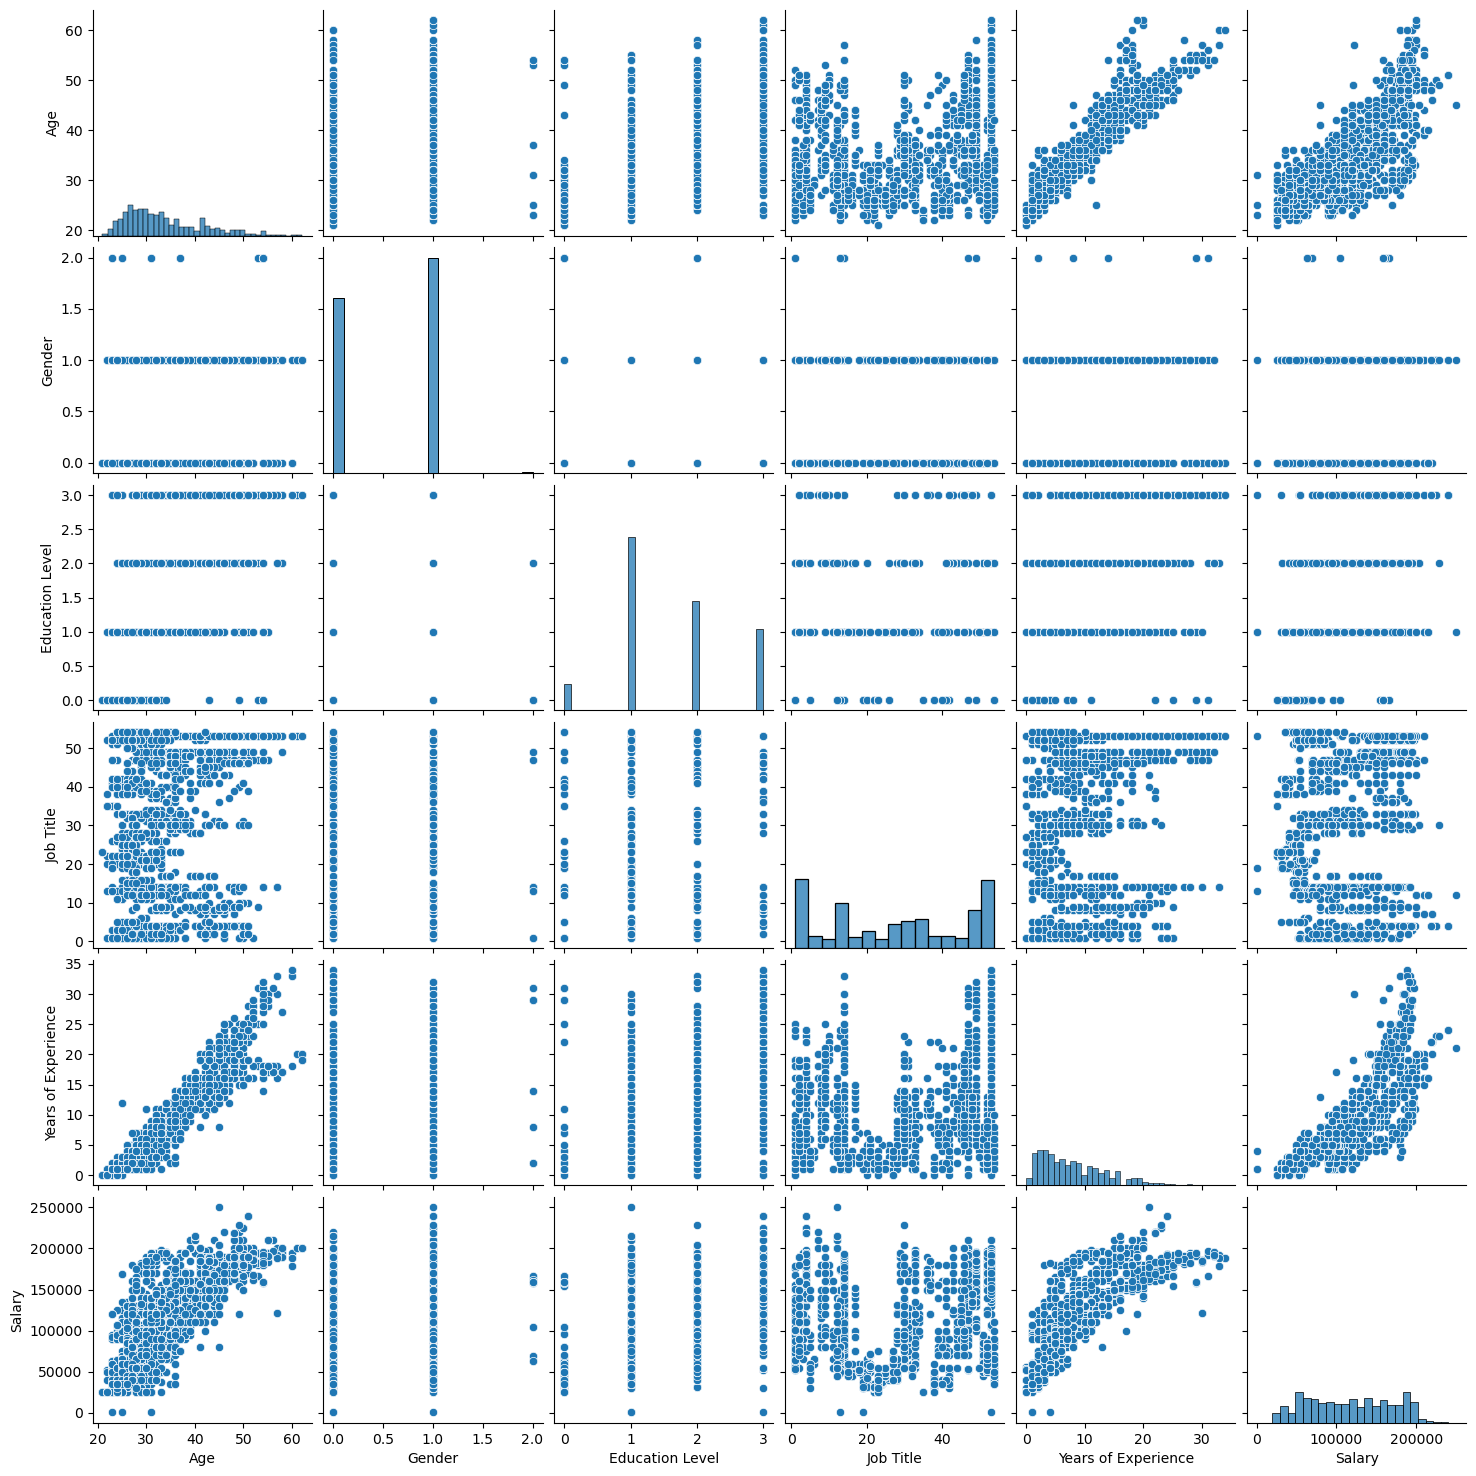

In [13]:
import seaborn as sns
sns.pairplot(salary)

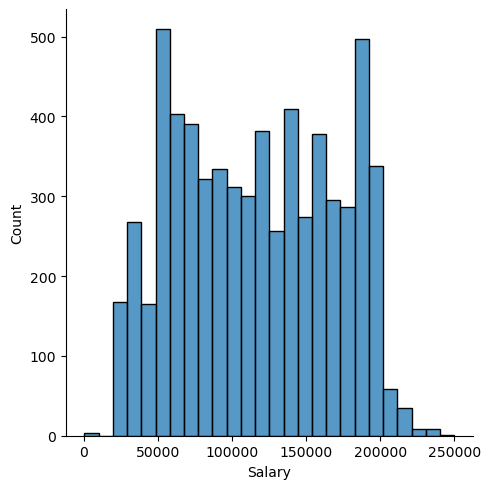

In [16]:
sns.displot(salary['Salary'])

<AxesSubplot:>

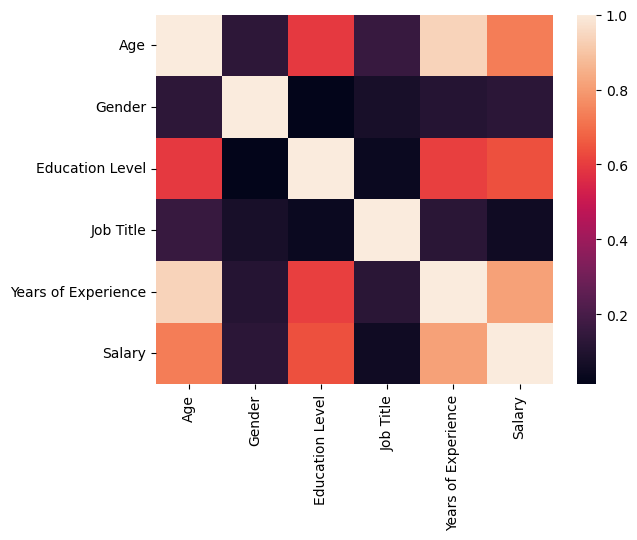

In [18]:
sns.heatmap(salary.corr())

In [19]:
#training a linear regression model
# Let's now begin to train out regression model!
#  We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable,
#  in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

###X and y arrays
x = salary[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = salary['Salary']

In [20]:
#train and test split
#we ll train out the model on training set and then use the test set to evaluate the model

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=101)

In [21]:
#creating and training the model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
#model Evaluation
#lets evaluate the model by checking out its coefficients and how we can interpret them

#print the intercept
print(lm.intercept_)

89832.98372432706


In [24]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,-1922.989518
Gender,6317.739357
Education Level,15894.307407
Job Title,-93.239229
Years of Experience,7929.694207


In [25]:
#  Predictions from our Model
# Let's grab predictions off our test set and see how well it did!

predictions =lm.predict(x_test)

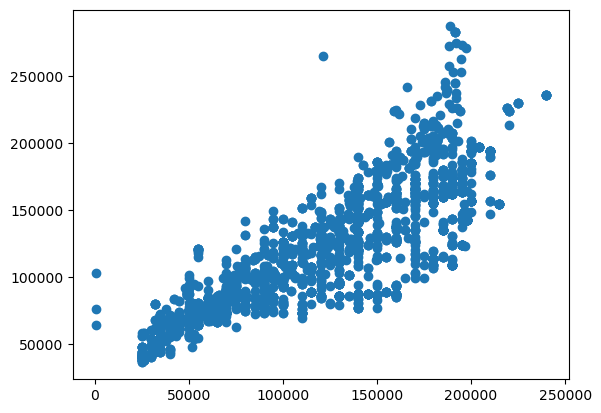

In [26]:
plt.scatter(y_test,predictions)

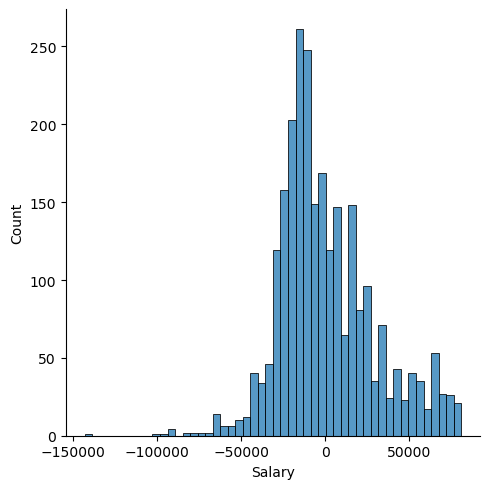

In [27]:
#residual histogram
sns.displot((y_test-predictions),bins=50);

In [28]:
#regression evaluation metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22521.880277114833
MSE: 845206885.067438
RMSE: 29072.442021052135
